### WNS Analytics Wizard
- It's Analytics Vidhya Hackathon consisting of the employees dataset.
- This is a classification problem in which we'll predict the promotion of the employee

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

In [2]:
# reading the files
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

### Exploratory Data Analysis

In [3]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
print(train.shape)
print(test.shape)

(54808, 13)
(23490, 12)


In [5]:
# stats about the dataset
train.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
# datatypes of the features
train.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [7]:
# checking the presence of null values
train.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

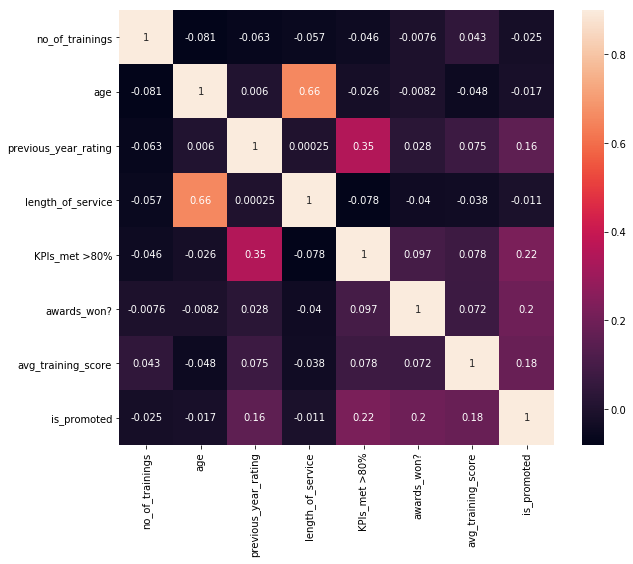

In [8]:
# correlation between the features
plt.figure(figsize=(10,8))
cor = train.corr()
sns.heatmap(cor, square=True, vmax=0.9, annot=True)

In [9]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


**Now we'll examine all the important features**

**1. Department**

In [10]:
train.groupby('is_promoted')['department'].value_counts()

is_promoted  department       
0            Sales & Marketing    15627
             Operations           10325
             Procurement           6450
             Technology            6370
             Analytics             4840
             Finance               2330
             HR                    2282
             Legal                  986
             R&D                    930
1            Sales & Marketing     1213
             Operations            1023
             Technology             768
             Procurement            688
             Analytics              512
             Finance                206
             HR                     136
             R&D                     69
             Legal                   53
Name: department, dtype: int64

- this looks pretty normal and doesn;t need much of the modification
- we'll simply convert this into categorical values in the later stage

** 2.  Education**

In [11]:
# education
train.groupby('is_promoted')['education'].value_counts(dropna=False)

is_promoted  education       
0            Bachelor's          33661
             Master's & above    13454
             NaN                  2287
             Below Secondary       738
1            Bachelor's           3008
             Master's & above     1471
             NaN                   122
             Below Secondary        67
Name: education, dtype: int64

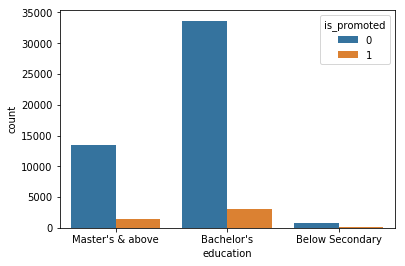

In [12]:
sns.countplot(x='education', data=train, hue='is_promoted', saturation=0.7)

- We'll make a new class of the null values
- Since their promotion probability is low as compared to the other classes, as shown in value counts

**3. Gender**

In [13]:
# gender
train.groupby('is_promoted')['gender'].value_counts()

is_promoted  gender
0            m         35295
             f         14845
1            m          3201
             f          1467
Name: gender, dtype: int64

- Since the promotion probability is same for both the genders i:e around 9%
- We can think of eliminating this feature from the feature set

**4. No. of Trainings**

In [14]:
train.groupby('is_promoted')['no_of_trainings'].value_counts()

is_promoted  no_of_trainings
0            1                  40468
             2                   7382
             3                   1654
             4                    442
             5                    125
             6                     42
             7                     12
             8                      5
             9                      5
             10                     5
1            1                   3910
             2                    605
             3                    122
             4                     26
             5                      3
             6                      2
Name: no_of_trainings, dtype: int64

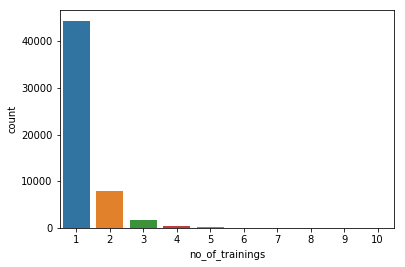

In [15]:
sns.countplot(x='no_of_trainings', data=train)

- People having 7,8,9,10 are not promoted even a single time
- Hence we can merge them all as one class

**5. Previous year rating**

In [16]:
# previous year rating
train.previous_year_rating.value_counts(dropna=False)

 3.0    18618
 5.0    11741
 4.0     9877
 1.0     6223
 2.0     4225
NaN      4124
Name: previous_year_rating, dtype: int64

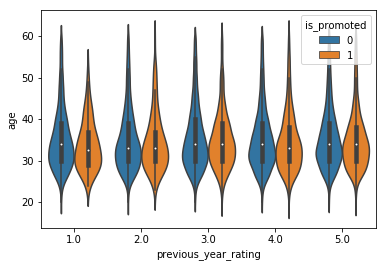

In [17]:
sns.violinplot(data=train, x='previous_year_rating', y='age', hue='is_promoted')

In [18]:
train.groupby('is_promoted')['previous_year_rating'].value_counts()

is_promoted  previous_year_rating
0            3.0                     17263
             5.0                      9820
             4.0                      9093
             1.0                      6135
             2.0                      4044
1            5.0                      1921
             3.0                      1355
             4.0                       784
             2.0                       181
             1.0                        88
Name: previous_year_rating, dtype: int64

- The null partition values best match up with 3rd no of class of previous year rating
- Hence we'll merge it to the 3 class

**6. Length of services**

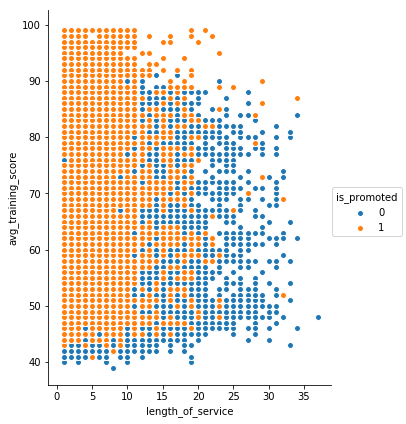

In [19]:
# Lenght of service
# checking the outliers
sns.pairplot(x_vars='length_of_service', y_vars='avg_training_score', hue='is_promoted',
             data=train, aspect=0.8, size=6)

In [20]:
#checking for outliers present
fmean = train.length_of_service.mean()
fstd = train.length_of_service.std()

In [21]:
# no. of outliers
outlier = train.loc[np.abs(train.length_of_service-fmean) >(3.5*fstd), 'length_of_service']
outlier.count()

518

In [22]:
outlier.index

Int64Index([23560, 34312, 51292, 49737, 57893, 41337, 15620, 73508, 15463,
            62158,
            ...
            39936, 48499, 71700, 34128, 30941, 46097, 40027,  6905, 72928,
            67505],
           dtype='int64', name='employee_id', length=518)

In [23]:
indices = outlier.index
list(indices)
type(indices)

pandas.core.indexes.numeric.Int64Index

#### There are about a total 975 outliers present in this feature
- We'll remove them by using the index column

In [24]:
# removing the outliers from train
train.drop(indices, inplace=True)

# checking if the outliers are still present
outlier = train.loc[np.abs(train.length_of_service-fmean) >(3.5*fstd), 'length_of_service']
outlier.count()

0

** 7. Awards Won**

In [25]:
# awards won
train.groupby('is_promoted')['awards_won?'].value_counts()

is_promoted  awards_won?
0            0              48939
             1                711
1            0               4082
             1                558
Name: awards_won?, dtype: int64

- Here we didn't conclude much about the awards one
- But we'll have this feature cause of it's correaltion with the target variable

**8. Average Training Score**

In [26]:
# checking the outliers

fmean = train.avg_training_score.mean()
fstd = train.avg_training_score.std()
train.loc[np.abs(train.avg_training_score-fmean) >(3*fstd), 'avg_training_score'].count()

0


 mu = 63.39 and sigma = 13.38



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


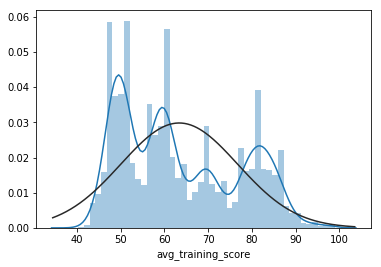

In [27]:
sns.distplot(train.avg_training_score , fit=norm)
(mu, sigma) = norm.fit(train.avg_training_score)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

- Since we can observe that the training distribution have high values of mu(µ) and sigma
- We'll then use transformation to eradicate the variance and make this feature more normalized

*We have completed the analysis part , now comes the cleaning of the data*

### Data Cleaning

In [28]:
# seperating the target variable
target = train.is_promoted

In [29]:
# making data from train and test
train.drop('is_promoted', 1, inplace=True)
data = train.append(test)

In [30]:
# shape of the dataframes
print(train.shape)
print(test.shape)
print(data.shape)
print(target.shape)

(54290, 12)
(23490, 12)
(77780, 12)
(54290,)


**Imputing missing values**

- Education

In [31]:
# education
train.education.value_counts(dropna=False)

Bachelor's          36420
Master's & above    14672
NaN                  2393
Below Secondary       805
Name: education, dtype: int64

In [32]:
# making a new class
data.education.fillna('Matriculation', inplace=True)

- Previous year rating

In [33]:
# Previous year rating
train.previous_year_rating.value_counts(dropna=False)

 3.0    18416
 5.0    11624
 4.0     9781
 1.0     6162
 2.0     4183
NaN      4124
Name: previous_year_rating, dtype: int64

In [34]:
# merging the null with the 3rd class
data.previous_year_rating.fillna(3, inplace=True)

*checking if any null reamains*

In [35]:
data.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

- Gender
- Age

In [36]:
# we'll remove these on a temporary basis as it might be helpful
data.drop(['age', 'gender'], 1, inplace=True)

- No. of Trainings

In [37]:
# we'll merge the higher traning numbers into one class
data.no_of_trainings.replace([8,9,10], 7, inplace=True)

- Average Training Score

In [38]:
# we'll use log10 transformation to reduce the variance(sigma) of the noraml distribution
data.avg_training_score = np.log10(data.avg_training_score)

mu = 1.79 and sigma = 0.09


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


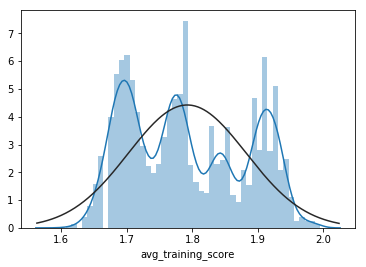

In [39]:
# plotting the distribution
sns.distplot(data.avg_training_score , fit=norm)
(mu, sigma) = norm.fit(data.avg_training_score)
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

*The Data Cleaning part is over and hence we move on to the next step*

In [40]:
# shapes
print(train.shape)
print(test.shape)
print(data.shape)

(54290, 12)
(23490, 12)
(77780, 10)


### Feature Engineering

In [41]:
# removing undesired characters from column names

data.rename(columns={'awards_won?':'awards'}, inplace=True)
data.rename(columns={'KPIs_met >80%': 'KPI'}, inplace=True)

**Tranforming categorical features**

In [42]:
# using Label Encoder from sklearn to do this

from sklearn.preprocessing import LabelEncoder
features = data.columns
for s in features:
    label = LabelEncoder()
    label.fit(list(data[s].values))
    data[s] = label.transform(list(data[s].values))

In [43]:
data = pd.get_dummies(data, columns=['education', 'recruitment_channel','no_of_trainings',
                                     'previous_year_rating','KPI','awards'])

In [44]:
data.shape

(77780, 27)

In [45]:
data.head()

,department,region,length_of_service,avg_training_score,education_0,education_1,education_2,education_3,recruitment_channel_0,recruitment_channel_1,...,no_of_trainings_6,previous_year_rating_0,previous_year_rating_1,previous_year_rating_2,previous_year_rating_3,previous_year_rating_4,KPI_0,KPI_1,awards_0,awards_1
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,7,31,7,10,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
65141,4,14,3,21,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
7513,7,10,6,11,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2542,7,15,9,11,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
48945,8,18,1,34,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [46]:
# modifying the data into train and the test
train = data[:train.shape[0]]
test = data[train.shape[0]:]

In [47]:
print(train.shape)
print(test.shape)
print(target.shape)

(54290, 27)
(23490, 27)
(54290,)


In [48]:
# importing alorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# computing techniques
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [49]:
# using train-test split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=.25, random_state=7)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40717, 27)
(13573, 27)
(40717,)
(13573,)


**First we'll use cross validation to test our f1 score over all algorithms**

In [51]:
# Decision Tree
tree = make_pipeline(StandardScaler(), DecisionTreeClassifier())
tree_score = (cross_val_score(tree, X_train, y_train, cv=9, scoring='f1').mean())

In [52]:
tree_score

In [53]:
# Random Forest
forest = make_pipeline(StandardScaler(), RandomForestClassifier())
forest_score = cross_val_score(forest, X_train, y_train, cv=10, scoring='f1').mean()

In [54]:
forest_score

In [55]:
# Gradient Boosting
boost = make_pipeline(StandardScaler(), GradientBoostingClassifier())
boost_score = cross_val_score(boost, X_train, y_train, cv=10, scoring='f1').mean()

In [56]:
boost_score

In [57]:
# Bagging Classifier
bag = make_pipeline(StandardScaler(), BaggingClassifier())
bag_score = cross_val_score(bag, X_train, y_train, scoring='f1', cv=10).mean()

In [58]:
bag_score

In [59]:
# Extra tree
extra = make_pipeline(StandardScaler(), ExtraTreesClassifier())
extra_score = cross_val_score(extra, X_train, y_train, scoring='f1', cv=10).mean()

In [60]:
extra_score

**Using same train test split distributed data**

In [61]:
# DecisionTreeClassifier
tree = DecisionTreeClassifier(min_samples_split=4, min_samples_leaf=4)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
tree_f1 = (f1_score(y_test, pred))

'\ntree = DecisionTreeClassifier(min_samples_split=4, min_samples_leaf=4)\ntree.fit(X_train, y_train)\npred = tree.predict(X_test)\ntree_f1 = (f1_score(y_test, pred))\n# RandomForestClassifier\n\nforest = RandomForestClassifier( min_samples_leaf=3, n_estimators=11)\nforest.fit(X_train, y_train)\npred = forest.predict(X_test)\nforest_f1 = (f1_score(y_test, pred))\n\n\n# GradientBoostingClassifier\nboost = GradientBoostingClassifier(learning_rate=.3)\nboost.fit(X_train, y_train)\npred = boost.predict(X_test)\nboost_f1 = ((f1_score(y_test, pred)))\n\n\n# Bagging clasifier\nbag = BaggingClassifier()\nbag.fit(X_train, y_train)\npred = bag.predict(X_test)\nbag_f1 = f1_score(y_test, pred)\n\n# Extre trees Classiifer\nextra = ExtraTreesClassifier(n_jobs=10)\nextra.fit(X_train, y_train)\nextra.predict(X_test)\nextra_f1 = f1_score(y_test, pred)'

In [ ]:
tree_f1

In [ ]:
# RandomForestClassifier

forest = RandomForestClassifier( min_samples_leaf=3, n_estimators=11)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
forest_f1 = (f1_score(y_test, pred))

In [ ]:
forest_f1

In [ ]:
# GradientBoostingClassifier
boost = GradientBoostingClassifier(learning_rate=.3)
boost.fit(X_train, y_train)
pred = boost.predict(X_test)
boost_f1 = ((f1_score(y_test, pred)))

In [ ]:
boost_f1

In [ ]:
# Bagging clasifier
bag = BaggingClassifier()
bag.fit(X_train, y_train)
pred = bag.predict(X_test)
bag_f1 = f1_score(y_test, pred)

In [ ]:
bag_f1

In [ ]:
# Extre trees Classiifer
extra = ExtraTreesClassifier(n_jobs=10)
extra.fit(X_train, y_train)
extra.predict(X_test)
extra_f1 = f1_score(y_test, pred)

In [ ]:
extra_f1

- Looks like the cross validation doesn't prove to be good enough
- Hence we'll stick to the train test method

#### Using GridSearch CV
- using the two best performing models to furthur predictions

In [62]:
# Gradient Boost
para = {'learning_rate':[.25,.32,.36,]}
grad = GradientBoostingClassifier()
boost = GridSearchCV(grad, param_grid=para)
boost.fit(X_train,y_train)
pred = boost.predict(X_test)

In [63]:
f1_score(y_test, pred)

0.4865203761755486

In [64]:
from sklearn.ensemble import BaggingClassifier

In [65]:
# Bagging Classifier
parameter = {'n_estimators':[300, 400]}
bag = BaggingClassifier()
bagg = GridSearchCV(bag, param_grid=parameter)
bagg.fit(X_train, y_train)
pred = bagg.predict(X_test)

In [66]:
f1_score(y_test, pred)

0.4769403824521935

#### Model Stacking

In [67]:
# importing the class parameters from base module
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [68]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    # constructor to assign the models passed
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   


In [69]:
stacked = AveragingModels(models = (boost, bagg))

In [71]:
stacked.fit(X_train, y_train)
pred = stacked.predict(X_test)

In [72]:
pred

array([0., 0., 0., ..., 0., 0., 0.])

- Making submission to csv

In [81]:
prediction = bagg.predict(test)

In [74]:
sub = pd.DataFrame()
sub['employee_id'] = test.index
sub['is_promoted'] = pred

ValueError: Length of values does not match length of index

In [83]:
sub.to_csv('stack.csv', index=None)